Del a) Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1
i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i
kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’. Merk:
filen ‘support_uke_24.xlsx’ må ligge i samme mappe som Python-programmet ditt.

Del b) Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
visualiseres ved bruk av et søylediagram (stolpediagram

.
Del c) Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
Svaret skrives til skjerm med informativ ek

st.
Del d) KREVENDE: Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
henvendelseri uk
e 24.
Del e) Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kake

del f)
Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk:
Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.inn!
diagram).

Den korteste samtalen i uke 24 var på 00:00:59 , mens den lengste varte i 00:11:28
Den gjennomsnittlige samtalen i uke 24 varte i  0 days 00:06:40.009216589


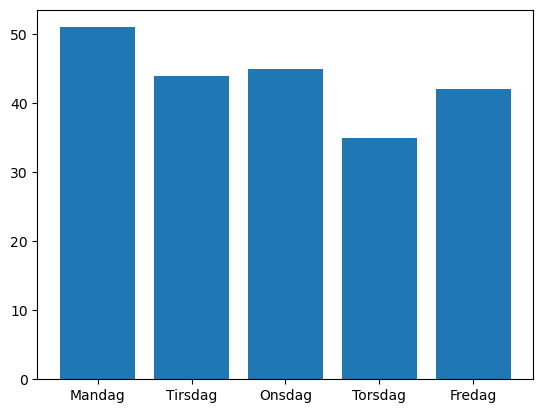

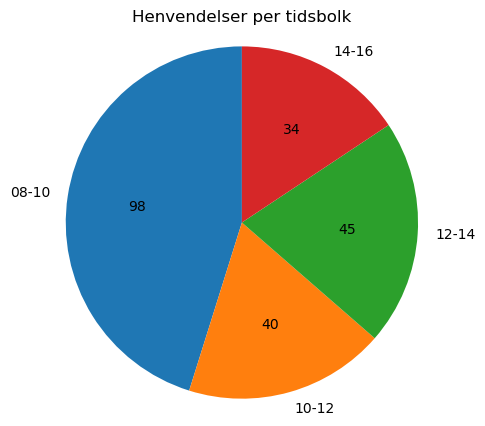

NSP for uke 24 er  41.8 % der det totalt er  43 tilbakemeldinger.
Det er  23.3 % negative svar.
Det er  11.6 % nøytrale svar.
Det er  65.1 % positive svar.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime

surveyData = pd.read_excel('support_uke_24.xlsx', index_col = None) #reading the excel file, no index column in file
#Oppretter array for hver kolonne
u_dag = surveyData['Ukedag'].values
kl_slett = surveyData['Klokkeslett'].values
varighet = surveyData['Varighet'].values
score = surveyData['Tilfredshet'].values

#Henter ut essensiell data for å lage søylediagram
survey_counter = Counter(u_dag)
survey_days = list(survey_counter.keys())
survey_count_days = list(survey_counter.values())

# printer søylediagrammet
plt.bar (survey_days, survey_count_days)

#printer linje for min og max samtaletid i uke 24. Ingen beregninger nødvendig.
print('Den korteste samtalen i uke 24 var på', min(varighet),', mens den lengste varte i',max(varighet))    

def gjennomsnitt_varighet(varighet):
    #Funksjon som beregner/henter ut den gjennonsnittlige samtaletiden. 
    tidsdeltaliste = pd.to_timedelta(varighet)
    gjennomsnitt = tidsdeltaliste.mean()
    return str(gjennomsnitt)
print('Den gjennomsnittlige samtalen i uke 24 varte i ',gjennomsnitt_varighet(varighet))

def henvendelser_bolk(kl_slett):
    # Konverterer verdiene i klslett arrayet til timestamp format.
    timestamps = pd.to_datetime(kl_slett, format='%H:%M:%S')
    
    # Deler inn i tidsbolker
    perioder = {
        '08-10': 0,
        '10-12': 0,
        '12-14': 0,
        '14-16': 0
    }
    
    # Teller gjennom for hver tidsbolk
    for ts in timestamps:
        hour = ts.hour
        if 8 <= hour < 10:
            perioder['08-10'] += 1
        elif 10 <= hour < 12:
            perioder['10-12'] += 1
        elif 12 <= hour < 14:
            perioder['12-14'] += 1
        elif 14 <= hour < 16:
            perioder['14-16'] += 1
     
    # kakeskjema 
    intervall_navn = list(perioder.keys()) #henter ut navnene for lista, for presentasjon
    bolk = list(perioder.values())  
    #Beregner absolutt verdiene, for å vise dette i kakediagrammet
    def absolute_value(val):
        a = int(round(val/100.*sum(bolk)))
        return a
    #definerer ulike funksjoner i kakediagrammet, for at det skal se ok ut  
    plt.figure(figsize=(5, 5))
    plt.pie(bolk, labels = intervall_navn, autopct=absolute_value, startangle=90)
    plt.title('Henvendelser per tidsbolk')
    plt.axis('equal')  
    plt.show()
    return perioder

result = henvendelser_bolk(kl_slett)

def NPScore(score):
    scores = score
    # Deler inn score grupper etter hva som er betraktet negativt, nøytralt og positivt
    score_gruppe = {
        '1-6': 0,
        '7-8': 0,
        '9-10': 0
    }
    
    # Teller gjennom for hver score gruppe, ignorerer tomme celler
    for s in scores:
        if 1<= s <7 :
            score_gruppe['1-6'] += 1
        elif 7<= s <9:
            score_gruppe['7-8'] += 1
        elif 9 <= s <11:
            score_gruppe['9-10'] += 1
    #BEregninger for å komme frem til NSP 
  #  score_gruppe_navn = list(score_gruppe.keys()) 
    gruppe_verdier = list(score_gruppe.values()) #henter ut verdiene i lista
    sum_svar = sum(gruppe_verdier) #Teller antall svar gitt i uke 24
    negative_prosent = round(((gruppe_verdier[0] / sum_svar)*100),1) #finner posentvis negative svar, samt runder til 2 desimaler
    nøytrale_prosent = round(((gruppe_verdier[1] / sum_svar)*100),1) #finner posentvis nøytrale svar, samt runder til 2 desimaler
    positive_prosent = round(((gruppe_verdier[2] / sum_svar)*100),1) #finner posentvis positive svar, samt runder til 2 desimaler
    NSP = round(positive_prosent - negative_prosent,2) #finner posentvis negative svar
    print('NSP for uke 24 er ',NSP, '% der det totalt er ',sum_svar, 'tilbakemeldinger.') #printer linje for svar, her kan man utvide mye for å få en fin visuell side
    print('Det er ',negative_prosent,'% negative svar.')
    print('Det er ',nøytrale_prosent,'% nøytrale svar.')
    print('Det er ',positive_prosent,'% positive svar.')
    return NSP
    
resultDEM = NPScore(score)